<font size="6">Naive Bayes</font><br>
<font size="3">Prof. Dr. Renato Moraes Silva</font>

## Baixando a base de dados e Visualizando os Dados

In [ ]:
# Importando bibliotecas para computação científica e análise de dados
import numpy as np  # Biblioteca para arrays e operações numéricas
import pandas as pd  # Biblioteca para manipulação de dados tabulares

# Importando biblioteca para aprendizado de máquina
import sklearn as skl  # Biblioteca para aprendizado de máquina

# Importando bibliotecas para manipulação de strings e expressões regulares
import re  # Biblioteca para operações com expressões regulares

# Importando bibliotecas para interagir com o sistema operacional
import os  # Biblioteca para operações do sistema operacional, como manipulação de arquivos e diretórios
import subprocess  # Biblioteca para criação de novos processos e execução de comandos do sistema

# Importando biblioteca para manipulação de arquivos ZIP
from zipfile import ZipFile  # Classe para manipulação de arquivos ZIP

# Instalando e importando biblioteca para processamento de linguagem natural (NLP)
!pip install nltk
import nltk  # Biblioteca para processamento de linguagem natural

# Importando um stemmer específico para o português
from nltk.stem import RSLPStemmer  # Stemmer para a língua portuguesa

# Importando biblioteca para manipulação de caracteres Unicode
import unicodedata  # Biblioteca para manipulação de dados Unicode

# Instalando e importando biblioteca para modelagem de tópicos e processamento de texto
!pip install gensim
import gensim  # Biblioteca para modelagem de tópicos e processamento de texto

# Importando modelos de embeddings de palavras do gensim
from gensim.models import Word2Vec, KeyedVectors  # Modelos de embeddings de palavras

# Reimportando sklearn para acesso a módulos específicos
import sklearn as skl  # Biblioteca para aprendizado de máquina

# Importando módulos específicos do scikit-learn
from sklearn import linear_model, feature_extraction  # Modelos lineares e extração de características

# Importando classes para validação cruzada e otimização de hiperparâmetros
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV  # Validação cruzada estratificada e busca aleatória de hiperparâmetros

# Importando classe para codificação de rótulos categóricos
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer  # Codificação de rótulos categóricos

# Importando métricas para avaliação de modelos de aprendizado de máquina
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report  # Métricas de avaliação de performance de modelos

# Importando algoritmo de regressão logística
from sklearn.linear_model import LogisticRegression  # Algoritmo de classificação linear (Regressão Logística)

# Importanto para download através do google
from google.colab import files

# Importa a biblioteca matplotlib.pyplot para visualização de gráficos
import matplotlib.pyplot as plt

# Importa a biblioteca seaborn para visualização estatística
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from scipy import sparse

!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
import os
import subprocess

#define função para dowload
def download(url, path):

    # comando para fazer o download
    cmd = ['wget', '-q', url, '-O', '%s' %(path)]

    # executa o comando sem exibir a saída na tela
    processo = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # aguarda o término do download
    stdout, stderr = processo.communicate()

    # Verifica se o processo foi concluído com sucesso (código de retorno zero)
    if processo.returncode == 0:
        print(f'Processo finalizado.')
    else:
        print(f'Houve um erro: {stderr.decode("utf-8")}')

In [ ]:
#define função para descompactação
def unzip(path, pathFolder):

    try:
        # descompacta ao arquivo
        z = ZipFile(path, 'r')
        z.extractall(pathFolder)
        z.close()

        print("Arquivo descompactado com sucesso!")
    except:
        print("Houve um erro ao tentar descompactar o arquivo")

In [ ]:
url = 'https://www.dropbox.com/scl/fi/nvnwiv3qk4h2usyusizyw/arquivos_competicao.zip?rlkey=6cnsqmqfqn2w6c8xc296vvtg9&st=w0gst5mi&dl=0'

# especifica o local onde ficarao os arquivos
path_files = 'dados'
path_folder = '/content/dados'
path_dataset_name = '/arquivos_competicao.zip'
path_dataset = '/arquivos_competicao'

#Faz dowload da base de dados
download(url, path_dataset_name)

# descompacta a base de dados de notícias
unzip(path_dataset_name, path_files)

Processo finalizado.
Arquivo descompactado com sucesso!


In [ ]:
# Carregue o arquivo CSV de treino e teste
train_dataset = pd.read_csv(f'{path_folder+path_dataset}/train.csv')
test_dataset = pd.read_csv(f'{path_folder+path_dataset}/test.csv')

In [ ]:
train_dataset

,ID,Class
0,news_00002.xml,Mercados
1,news_00003.xml,Mercados
2,news_00006.xml,Mercados
3,news_00007.xml,Economia
4,news_00008.xml,Mercados
...,...,...
2776,news_03969.xml,Mercados
2777,news_03971.xml,Mercados
2778,news_03972.xml,Economia
2779,news_03973.xml,Mercados


In [ ]:
test_dataset

,ID
0,news_00001.xml
1,news_00004.xml
2,news_00005.xml
3,news_00011.xml
4,news_00015.xml
...,...
1188,news_03946.xml
1189,news_03948.xml
1190,news_03950.xml
1191,news_03965.xml


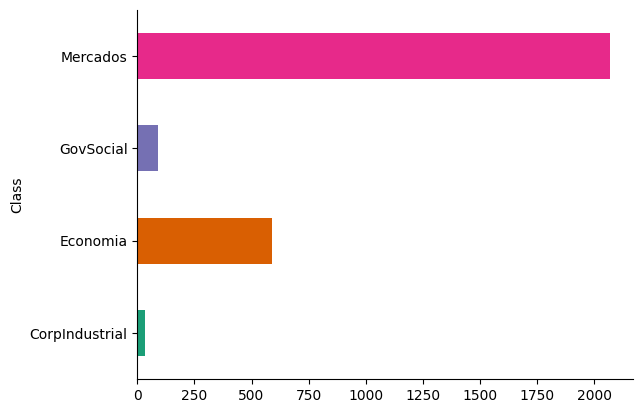

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train_dataset.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Pré-processamento da base de dados do tipo Text


In [ ]:
# Copiar a coluna "ID" do conjunto de dados de treinamento para uma variável separada.
train_df = train_dataset["ID"].copy()

# Copiar a coluna "Class" do conjunto de dados de treinamento para outra variável separada.
train_class_df = train_dataset["Class"].copy()

# Copiar a coluna "ID" do conjunto de dados de teste para uma variável separada.
test_df = test_dataset["ID"].copy()

# Obter as classes distintas presentes na coluna "Class" do conjunto de dados de treinamento.
distinctive_classes = np.unique(train_class_df)

# Imprimir as classes distintas presentes no conjunto de dados de treinamento.
print(f"Classes distintas:\n{distinctive_classes}")

Classes distintas:
['CorpIndustrial' 'Economia' 'GovSocial' 'Mercados']


In [ ]:
def preprocess_xml(filename):
    """
    Pré-processa um arquivo XML, lendo seu conteúdo e retornando como texto.

    Args:
        filename (str): O nome do arquivo XML a ser pré-processado.

    Returns:
        str: O conteúdo do arquivo XML como texto.
    """
    news_path = "/news"
    path = path_folder + path_dataset + news_path  # Caminho completo para o diretório de notícias
    file_text = open(path + '/' + filename, "r", encoding='utf8', errors='replace')  # Abre o arquivo XML para leitura
    text = file_text.read()  # Lê o conteúdo do arquivo XML como texto
    return text

# Pré-processamento dos arquivos XML de treinamento
for i, news_id in enumerate(train_df):
    train_df[i] = preprocess_xml(news_id)

# Pré-processamento dos arquivos XML de teste
for i, news_id in enumerate(test_df):
    test_df[i] = preprocess_xml(news_id)


In [ ]:
train_df

0       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
1       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
3       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
4       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
                              ...                        
2776    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2777    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2778    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2779    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2780    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
Name: ID, Length: 2781, dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('rslp')

def preprocessing_portuguese(text, stemming = False, stopwords = False):
  """
    Funcao usada para tratar textos escritos na lingua portuguesa

    Parametros:
        text: variavel do tipo string que contem o texto que devera ser tratado

        stemming: variavel do tipo boolean que indica se a estemizacao deve ser aplicada ou nao

        stopwords: variavel do tipo boolean que indica se as stopwords devem ser removidas ou nao
    """

  # Lower Case
  text = text.lower()

  # remove os acentos das palavras
  nfkd_form = unicodedata.normalize('NFKD', text)
  text = u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

  # remove tags HTML e XML
  regex = re.compile('<[^<>]+>')
  text = re.sub(regex, " ", text)

  # normaliza as URLs
  regex = re.compile('(http|https)://[^\s]*')
  text = re.sub(regex, "<URL>", text)

  # normaliza emails
  regex = re.compile('[^\s]+@[^\s]+')
  text = re.sub(regex, "<EMAIL>", text)

  # converte todos os caracteres não-alfanuméricos em espaço
  regex = re.compile('[^A-Za-z0-9]+')
  text = re.sub(regex, " ", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+.[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+,[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # substitui varios espaçamentos seguidos em um só
  text = ' '.join(text.split())

  # separa o texto em palavras
  words = text.split()

  # remove stopwords
  if stopwords:
    words = text.split() # separa o texto em palavras
    words = [w for w in words if not w in nltk.corpus.stopwords.words('portuguese')]
    text = " ".join( words )

  # aplica estemização
  if stemming:
    stemmer_method = RSLPStemmer()
    words = [ stemmer_method.stem(w) for w in words ]
    text = " ".join( words )

  # remove palavras compostas por apenas um caracter
  words = text.split() # separa o texto em palavras
  words = [ w for w in words if len(w)>1 ]
  text = " ".join( words )

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
print('Antes do tratamento: ', train_df[3])

Antes do tratamento:  <?xml version="1.0" encoding="UTF-8"?>

<newsitem date="1996-10-29" id="root" itemid="50139" xml:lang="pt">
<title></title>
<headline> ÍNDICE PREÇOS PRODUÇÃO INDUSTRIAL AGO 1996 SOBE. </headline>
<byline></byline>
<dateline></dateline>
<text>
<p>     LISBOA, 29 Out (Reuter) - O Índice de Preços na Produção </p>
<p> Industrial subiu 0,3 pct para 120,6 em Agosto de 1996 </p>
<p> relativamente ao mês anterior, tendo aumentado 3,1 pct face a </p>
<p> Agosto de 1995, segundo dados hoje divulgados pelo Instituto </p>
<p> Nacional de Estatística (INE). </p>
<p>     A partir de Agosto de 1996, o INE passa a publicar o índice </p>
<p> geral deste indicador, o qual agrega &quot;cerca de 72 pct do valor </p>
<p> total das vendas de produtos, da indústria portuguesa, para o </p>
<p> mercado nacional&quot;, depois de passar a incluir os bens </p>
<p> intermédios e os bens de consumo não duradouro, segundo </p>
<p> informação do INE. </p>
<p>     .       AGO96     JUL96 AGO95  

In [ ]:
print('\nDepois do tratamento: ', preprocessing_portuguese(train_df[3], stemming = True, stopwords = True))


Depois do tratamento:  indic prec produca industr ago numer sob lisbo numer out reut indic prec produca industr sub numer pct numer agost numer relativ me anteri tend aument numer pct fac agost numer segund dad hoj divulg institut nacion estatis ine part agost numer ine pass public indic geral dest indic agreg quot cerc numer pct val total vend produt industr portugu merc nacion quot pass inclu bem intermedi bem consum nao duradour segund informaca ine agonumer julnumer agonumer indic geral numer numer numer variaca mens numer pct numer pct variaca homolog numer pct numer pct acumul ano numer pct numer pct acumul ult numer mes numer pct numer pct lisbo editor numer numer reut limited numer reut limited numer


In [ ]:
# Aplicar a função de pré-processamento aos conjuntos de dados de treino e teste com remoção de stopwords e estemizacao
train_df = train_df.apply(lambda x: preprocessing_portuguese(x, stemming=True, stopwords=True))
test_df = test_df.apply(lambda x: preprocessing_portuguese(x, stemming=True, stopwords=True))

In [ ]:
train_df

0       futur ot dez numer cai numer contr numer pt fu...
1       resum transacco merc continu lisbo numer set r...
2       indic psinumer sob numer pont numer numer lisb...
3       indic prec produca industr ago numer sob lisbo...
4       bdp interromp problem comunicaco lisbo numer s...
                              ...                        
2776    mmi transacc numer mc futur faz numer mc lisbo...
2777    escud abr pression alt contr marc escud abr su...
2778    result ult colocaco bt pdnw dat praz coloc tax...
2779    acco preve corrig esper nov iorqu acco continu...
2780    ugt qu assin ace falt numer aument salari nume...
Name: ID, Length: 2781, dtype: object

In [ ]:
test_df

0       prova inflaca retom tendenc descend ine lisbo ...
1       mmi transacc numer mc futur faz numer mc lisbo...
2       acco segu pouc volatel apat dev mant lisbo num...
3       escud seg estavel apa mei sessa escud segu rel...
4       mmi transacc numer mc tmp numer pct lisbo nume...
                              ...                        
1188    sistem fiscal penaliz empr nao financ aip lisb...
1189    sous franc admit polic fiscal mant sigil lisbo...
1190    ipi nov numer cai numer pct numer vs nov numer...
1191    bp nao cort tax dev inflaca camb lisbo numer n...
1192    ipc nao transaciona dev desc abaix numer bp li...
Name: ID, Length: 1193, dtype: object

### Núvem de Palavras

Palavras mais frequentes no dataframe de treinamento


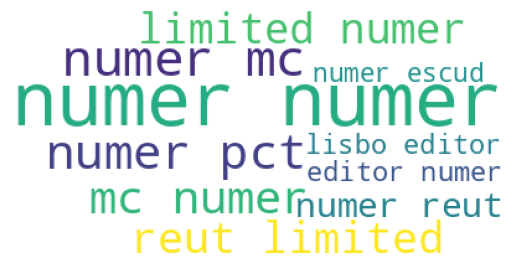


Palavras mais frequentes no dataframe de teste


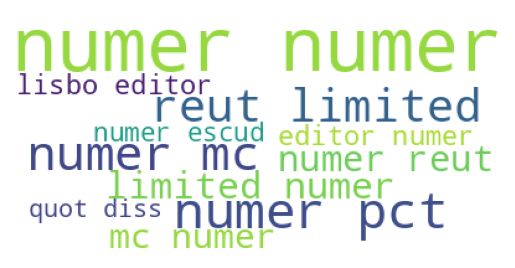

In [ ]:
def get_cloud_words(dataframe):
  wc = WordCloud(
    min_font_size = 20,
    max_font_size = 150,
    background_color = "white",
    relative_scaling=0.4
  )

  wc.generate(" ".join(dataframe))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

print("Palavras mais frequentes no dataframe de treinamento")
get_cloud_words(train_df)

print("\nPalavras mais frequentes no dataframe de teste")
get_cloud_words(test_df)

## Geração de Term-Frequency (TF)

É um processo essencial de análise de texto que envolve contar a frequência de cada termo em um corpus. Essa técnica, fundamental no processamento de linguagem natural, ajuda a entender a distribuição de palavras em um texto e serve como ponto de partida para uma variedade de aplicações, incluindo análise de sentimentos, classificação de texto e sumarização automática. Ao dividir o texto em unidades menores e contar suas ocorrências, "Gerando Term-Frequency" oferece insights valiosos sobre os padrões linguísticos presentes no corpus, permitindo análises mais profundas e modelagem de linguagem.

In [ ]:
# Criando uma instância do CountVectorizer para converter o texto em uma matriz de contagem de palavras
vectorizer = CountVectorizer(
    analyzer="word",  # Especificando que a análise será realizada por palavra
    preprocessor=None,  # Não aplicando nenhum pré-processamento personalizado
    tokenizer=None,  # Não utilizando um tokenizador personalizado
    dtype=np.int32,  # Definindo o tipo de dados dos valores da matriz como int32
    stop_words=None,
    binary=False,  # Contando a ocorrência das palavras em vez de atribuir 0 ou 1
    lowercase=True,  # Convertendo todas as palavras para minúsculas antes da contagem
)

# Convertendo os dados de treinamento (train_df) em uma matriz de contagem de palavras
X_train_tf = vectorizer.fit_transform(train_df)

# Convertendo os dados de teste (test_df) em uma matriz de contagem de palavras usando as mesmas palavras-chave do treinamento
X_test_tf = vectorizer.transform(test_df)

In [ ]:
# Obtendo os nomes das características (palavras) do vetorizador
feature_names = vectorizer.get_feature_names_out()

# Imprimindo as 10 primeiras palavras do vocabulário
print('Visualizando o vocabulário: ')
print(feature_names[0:10])

# Imprimindo as dimensões das matrizes de treinamento e teste para TF
print('Dimensão dos vetores de treino para TF: ', X_train_tf.shape)
print('Dimensão dos vetores de teste para TF: ', X_test_tf.shape)


Visualizando o vocabulário: 
['aa' 'aaa' 'aanumer' 'abaix' 'abal' 'aban' 'abandon' 'abastec' 'abat'
 'abbey']
Dimensão dos vetores de treino para TF:  (2781, 5168)
Dimensão dos vetores de teste para TF:  (1193, 5168)


## Geração de Term Frequency-Inverse Document Frequency (TF-IDF)

A pontuação TF-IDF de um termo em um documento é o produto da frequência do termo (TF) e da frequência inversa do documento (IDF). Isso significa que os termos que ocorrem com frequência em um documento específico, mas raramente em outros documentos, terão uma pontuação TF-IDF alta, o que os torna mais distintos e relevantes para o documento em questão.

In [ ]:
tf_idf_model = feature_extraction.text.TfidfTransformer(
  norm='l2',  # Parâmetro que especifica a normalização dos vetores TF-IDF ('l2' para norma euclidiana)
  smooth_idf=True,  # Parâmetro que controla se a frequência inversa do documento (IDF) é suavizada
  use_idf=True,  # Parâmetro que indica se a frequência inversa do documento (IDF) deve ser usada
  sublinear_tf=True  # Parâmetro que controla a aplicação de uma transformação logarítmica à frequência do termo (TF)
)

# Aplica o modelo TF-IDF aos dados de treinamento
X_train_tf_idf = tf_idf_model.fit_transform(X_train_tf)

# Aplica o modelo TF-IDF aos dados de teste
X_test_tf_idf = tf_idf_model.transform(X_test_tf)

In [ ]:
print('Dimensão dos vetores de treino para TF-IDF: ', X_train_tf_idf.shape)
print('Dimensão vetores de teste para TF-IDF: ', X_test_tf_idf.shape)

Dimensão dos vetores de treino para TF-IDF:  (2781, 5168)
Dimensão vetores de teste para TF-IDF:  (1193, 5168)


## Geração do modelo Binário

O modelo binário é uma abordagem simples e direta para representar dados textuais, onde cada termo em um documento é codificado como uma variável binária: 1 se o termo está presente no documento e 0 se não está. Esta técnica de binarização é uma maneira eficaz de simplificar a representação de texto, ignorando a contagem exata de ocorrências de termos e focando apenas na presença ou ausência deles.

In [ ]:
# Cria cópias dos conjuntos de dados de treinamento e teste
X_train_binary = X_train_tf.copy()
X_test_binary = X_test_tf.copy()

# Define todos os valores diferentes de zero nos conjuntos de dados como 1 (termo presente)
X_train_binary[X_train_binary != 0] = 1
X_test_binary[X_test_binary != 0] = 1

In [ ]:
print('Dimensão dos vetores de treino para Binário: ', X_train_binary.shape)
print('Dimensão vetores de teste para Binário: ', X_test_binary.shape)

Dimensão dos vetores de treino para Binário:  (2781, 5168)
Dimensão vetores de teste para Binário:  (1193, 5168)


## Geração de Word Embeddings

A geração de word embeddings é um processo fundamental no campo de processamento de linguagem natural (PLN), onde o objetivo é representar palavras como vetores numéricos em um espaço de alta dimensionalidade. Esses vetores capturam o significado semântico das palavras e são utilizados para alimentar algoritmos de PLN em uma variedade de tarefas, como análise de sentimento, tradução automática, sumarização de texto e muito mais.

In [ ]:
# Cria uma lista de listas contendo as palavras divididas de cada texto no conjunto de treinamento
train_df_embeddings = [text.split() for text in train_df]

# Cria uma lista de listas contendo as palavras divididas de cada texto no conjunto de teste
test_df_embeddings = [text.split() for text in test_df]

In [ ]:
print("10 palavras de treino")
print(train_df_embeddings[3][:10])

print("10 palavras de teste")
print(test_df_embeddings[3][:10])

10 palavras de treino
['indic', 'prec', 'produca', 'industr', 'ago', 'numer', 'sob', 'lisbo', 'numer', 'out']
10 palavras de teste
['escud', 'seg', 'estavel', 'apa', 'mei', 'sessa', 'escud', 'segu', 'relativ', 'estavel']


### Usando o próprio dataset para treinar as embeddings

Word Embeddings treinadas pelo próprio dataset pode se tornar uma abordagem eficaz quando o conjunto de dados for grande o suficiente e representativo o bastante para capturar a diversidade de riqueza da linguagem.

In [ ]:
# Atribui os dados de treinamento fornecidos (`train_df_embeddings`) à variável self_embedding_train
self_embedding_train = train_df_embeddings

# Define uma função para criar e treinar um modelo de embedding
def create_embedding_model(vector_size, window , min_count):
    # Inicializa e treina um modelo Word2Vec com os parâmetros especificados
    embedding_model = Word2Vec(
                        sentences = self_embedding_train,  # Dados de treinamento
                        vector_size = vector_size,  # Tamanho dos vetores de palavra
                        window = window,  # Janela de contexto máxima
                        min_count = min_count  # Contagem mínima de ocorrência de palavra
                      )

    # Calcula o tamanho do vocabulário do modelo treinado
    vocabulary_size = len(embedding_model.wv)

    # Imprime o tamanho do vocabulário na tela
    print("\nTamanho do vocabulário do modelo: ", vocabulary_size)

    # Retorna o modelo de embedding treinado
    return embedding_model

In [ ]:
embedding_model = create_embedding_model(200, 3 ,1)


Tamanho do vocabulário do modelo:  5168


In [ ]:
def get_doc_vector(model, doc):
    # Inicializa uma lista para armazenar os vetores das palavras no documento
    words_list = []

    # Itera sobre cada palavra no documento
    for word in doc:
        try:
            # Tenta obter o vetor da palavra no modelo de embedding
            vector = model.wv[word]
            # Se a palavra estiver presente no vocabulário, adiciona seu vetor à lista
            words_list.append(vector)
        except:
            # Se a palavra não estiver no vocabulário do modelo, passa para a próxima palavra
            pass

    # Calcula o vetor médio do documento, utilizando a média dos vetores das palavras presentes
    if len(words_list) > 0:
        mean_vector = np.mean(words_list, axis=0)
    else:
        # Se o documento estiver vazio ou todas as palavras estiverem fora do vocabulário, retorna um vetor de zeros
        mean_vector = np.zeros(model.wv.vector_size)

    # Retorna o vetor médio do documento
    return mean_vector

def dataset_2_feature_matrix(dataset, embedding_model):
    # Inicializa uma lista para armazenar os vetores médios de cada documento
    embedding = []

    # Itera sobre cada documento no conjunto de dados
    for doc in dataset:
        # Obtém o vetor médio do documento usando a função get_doc_vector
        vec = get_doc_vector(embedding_model, doc)
        # Adiciona o vetor médio do documento à lista de embeddings
        embedding.append(vec)

    # Converte a lista de embeddings em uma matriz numpy
    embedding = np.array(embedding)

    # Retorna a matriz de embeddings
    return embedding


In [ ]:
verify_doc_vector = ['a', 'economia', 'esta', 'ruim']

# Obtém o vetor médio para o documento de verificação usando a função get_doc_vector
document_vector = get_doc_vector(embedding_model, verify_doc_vector)

print("\nVerificar o vetor médio do documento de verificação: ", document_vector)

# Converte o conjunto de treinamento em uma matriz de características usando embeddings
X_train_embedding = dataset_2_feature_matrix(train_df_embeddings, embedding_model)

# Converte o conjunto de teste em uma matriz de características usando embeddings
X_test_embedding = dataset_2_feature_matrix(test_df_embeddings, embedding_model)

print("\nDimensão das embeddings de treino: ", X_train_embedding.shape)
print("Dimensão das embeddings de teste: ", X_test_embedding.shape)



Verificar o vetor médio do documento de verificação:  [-4.49493915e-01  2.67541617e-01  1.21019207e-01  2.96814412e-01
  5.88641644e-01 -2.55965050e-02  4.12277341e-01  4.16696250e-01
 -5.70736766e-01  4.05972272e-01 -3.36868018e-01 -3.51588391e-02
 -1.12476848e-01  6.07622385e-01  4.71717753e-02 -4.04162169e-01
 -6.60837293e-01  2.56234944e-01 -2.69177407e-02 -1.85303882e-01
  2.92207114e-02 -6.87190220e-02  3.67357969e-01  3.82026553e-01
  1.27421901e-01  4.78883907e-02 -2.65451252e-01 -6.02217317e-01
 -3.40605788e-02  1.08153999e-01  4.72830795e-02  9.02561322e-02
  2.33173743e-02 -1.03311405e-01  7.86297679e-01  5.01219125e-04
  1.01808444e-01  3.79106373e-01  7.13714838e-01 -2.77345777e-01
 -1.86682388e-01 -6.81758344e-01 -1.74459547e-01  2.78152436e-01
 -1.18263468e-01 -3.01740557e-01  5.53080797e-01  6.59538925e-01
  3.99700165e-01 -2.31320664e-01  2.38851234e-01  3.84665988e-02
  3.05945843e-01 -6.14019250e-03  4.88500267e-01  2.56981522e-01
  6.50842115e-02  2.50741243e-01  4

### Utilizando um modelo pré treinado de embeddings

Um modelo pré-treinado de embeddings é um modelo de embedding de palavras que foi treinado em um grande corpus de texto antes de ser disponibilizado para uso. Aqui estão alguns pontos importantes sobre modelos pré-treinados de embeddings:

será utilizado um modelo pré treinado disponibilizado em aula, dessa vez utilizando o KeyedVectors do Gensim.

In [ ]:
# URL de onde o arquivo de embeddings pré-treinados será baixado
url = 'http://143.107.183.175:22980/download.php?file=embeddings/fasttext/skip_s50.zip'

# Caminho onde o arquivo de embeddings pré-treinados será armazenado após o download
path_embedding_trained = path_folder + '/skip_s50.zip'

# Função para baixar o arquivo de embeddings pré-treinados do URL e salvar no caminho especificado
download(url, path_embedding_trained)

Processo finalizado.


In [ ]:
unzip(path_embedding_trained, path_folder)

Arquivo descompactado com sucesso!


In [ ]:
# Cria os vetores pela base de dados
embedded_pretrained = gensim.models.KeyedVectors.load_word2vec_format(f'{path_folder}/skip_s50.txt')

# Obter o tamanho do vocabulário do modelo
vocabSize = len(embedded_pretrained.index_to_key)
print("Tamanho do vocabulário do modelo: ", vocabSize)

Tamanho do vocabulário do modelo:  929605


In [ ]:
def get_word_vector(embedding_model, word):
    try:
        # Tenta obter o vetor de embedding para a palavra especificada no modelo de embedding
        return embedding_model.get_vector(word)
    except KeyError:
        # Se a palavra não estiver presente no vocabulário do modelo, retorna um vetor de zeros
        return np.zeros(embedding_model.vector_size)

def dataset_2_feature_matrix_pretrained(dataset, embedding_model):
    embedding = []

    for document in dataset:
        # Calcula o vetor de documento médio como a média dos vetores de palavras no documento
        doc_vector = np.mean([get_word_vector(embedding_model, word) for word in document], axis=0)
        # Adiciona o vetor de documento à lista de embeddings
        embedding.append(doc_vector)

    # Converte a lista de embeddings em uma matriz numpy
    embedding = np.array(embedding)

    return embedding


In [ ]:
X_train_emb_pretrained = dataset_2_feature_matrix_pretrained(train_df_embeddings, embedded_pretrained)
X_test_emb_pretrained = dataset_2_feature_matrix_pretrained(test_df_embeddings, embedded_pretrained)

print("Dimensão das embeddings pré treinadas de treino: ", X_train_emb_pretrained.shape)
print("Dimensão das embeddings pré treinadas de teste: ", X_test_emb_pretrained.shape)

Dimensão das embeddings pré treinadas de treino:  (2781, 50)
Dimensão das embeddings pré treinadas de teste:  (1193, 50)


## Busca Aleatória para Navie Bayes

A busca aleatória (Random Search) é uma técnica de otimização de hiperparâmetros que ajuda a encontrar a melhor combinação de valores para os hiperparâmetros de um modelo de aprendizado de máquina

In [ ]:
def random_search(X_train, Y_train):
  model = MultinomialNB()  # Inicializamos o modelo Multinomial Naive Bayes.
  alpha = np.logspace(-4, 4, 10)
  param_dist = {'alpha': alpha}  # Criamos um dicionário para passar esses valores como parâmetros para a busca.

  # Criamos um objeto RandomizedSearchCV para realizar a busca aleatória dos hiperparâmetros.
  random_search = RandomizedSearchCV(
      model,  # Usamos o modelo Multinomial Naive Bayes inicializado.
      param_dist,  # Passamos as distribuições dos parâmetros para a busca.
      n_iter=10,  # Definimos o número de iterações para testar diferentes combinações de hiperparâmetros.
      cv=5,  # Utilizamos 5-fold cross-validation.
      random_state=42  # Definimos uma seed para garantir a reprodutibilidade dos resultados.
  )

  # Verificamos se X_train é uma matriz esparsa e, se for, convertemos para uma matriz densa.
  if sparse.issparse(X_train):
      X_train = X_train.toarray()

  scaler = Normalizer(norm='l2')
  X_train = scaler.fit_transform(X_train)
  # Ajustamos o RandomizedSearchCV aos dados de treinamento para encontrar os melhores hiperparâmetros.
  random_search.fit(X_train, Y_train)

  # Extraímos os melhores parâmetros encontrados durante a busca.
  best_params = random_search.best_params_
  print("Os melhores hiperparâmetros:", best_params)

  # Inicializamos o modelo com os melhores parâmetros encontrados.
  selected_model = MultinomialNB(**best_params)
  return selected_model

In [ ]:
model = random_search(X_train_tf, train_class_df)

Os melhores hiperparâmetros: {'alpha': 0.005994842503189409}


In [ ]:
def generate_predictions_by_method(X_train, Y_train, X_test, method):
  # Como as embeddings podem gerar valores positivo ou negativos
    # Usamos o MinMaxScaler para normalizar os dados dos embeddings, garantindo que estejam no intervalo [0, 1].
  scaler = MinMaxScaler()

  if method in ["binario", "TF", "TF-IDF"]:
    # Para formatos como TF, TF-IDF e binário, onde os valores são contagens ou binários, a normalização L2 é aplicada.
    # Porque ajusta os vetores de forma que a soma dos quadrados dos elementos seja 1, preservando a direção dos vetores.
    scaler = Normalizer(norm='l2')

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model.fit(X_train, Y_train)

  return model.predict_proba(X_test)

## Predição Dataset de Treino e Teste

> Utilizando todos os modelos criados:
- TF
- TF-IDF
- Binário
- Word Embeddings
- Word Embeddings Pré Treinado

> Download das predições do dataset de teste em formato .csv


In [ ]:
def predictor(X_train, X_test, method):
  # Gera previsões com base no formato de entrada (TF, TF-IDF, embedding ou embedding pré-treinado)
  pred_test_df = generate_predictions_by_method(X_train, train_class_df, X_test, 'embedding' if method == 'embedding-pretrained' else method)

  # Cria um dicionário para armazenar as previsões usadas na saída (geração do csv)
  predictions_dict = {
      'ID': test_dataset["ID"],  # Coluna de identificação dos dados de teste
      'CorpIndustrial': pred_test_df[:, 0],  # Previsões para a classe 'CorpIndustrial'
      'Economia': pred_test_df[:, 1],  # Previsões para a classe 'Economia'
      'GovSocial': pred_test_df[:, 2],  # Previsões para a classe 'GovSocial'
      'Mercados': pred_test_df[:, 3]  # Previsões para a classe 'Mercados'
  }

  # Cria um DataFrame pandas a partir do dicionário
  dataframe_classificated = pd.DataFrame(predictions_dict)

  # Salva o DataFrame como um arquivo CSV com 5 casas decimais
  dataframe_classificated.to_csv(f'naive_bayes_{method}.csv', index=False, float_format='%.5f')

  # Nome do arquivo CSV a ser criado
  csv_filename = f'naive_bayes_{method}.csv'

  return csv_filename

In [ ]:
# Realiza a predição para diferentes formatos e salva os resultados em arquivos CSV
csv_filename_pre_embedding = predictor(X_train_emb_pretrained, X_test_emb_pretrained, method="embedding-pretrained")
csv_filename_tf = predictor(X_train_tf, X_test_tf, method="TF")
csv_filename_bin = predictor(X_train_binary, X_test_binary, method="binario")
csv_filename_embedding = predictor(X_train_embedding, X_test_embedding, method="embedding")
csv_filename_tfidf = predictor(X_train_tf_idf, X_test_tf_idf, method="TF-IDF")

# Baixa os arquivos CSV criados
files.download(csv_filename_tf)
files.download(csv_filename_bin)
files.download(csv_filename_embedding)
files.download(csv_filename_pre_embedding)
files.download(csv_filename_tfidf)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import roc_curve, auc

def validation_model(X, y, method):
    # Armazena os scores de F1 e AUC para cada iteração da validação cruzada
    auc_scores = []
    f1_scores = []

    # Para armazenar curvas ROC
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    # Divide os dados em conjuntos de treinamento e validação usando validação cruzada estratificada
    kfold = StratifiedKFold(n_splits=15, shuffle=True)

    # Itera sobre cada fold da validação cruzada
    for train_i, val_i in kfold.split(X, y):
        X_train, X_val = X[train_i], X[val_i]
        y_train, y_val = y[train_i], y[val_i]

        # Gera as previsões para o conjunto de validação usando o método especificado
        y_proba = generate_predictions_by_method(X_train, y_train, X_val, method)

        # Calcula as métricas AUC e F1 para a iteração atual
        auc_value = roc_auc_score(y_val, y_proba, multi_class='ovo')
        f1 = f1_score(y_val, y_proba.argmax(axis=1), average='macro')

        # Armazena os scores para a iteração atual
        auc_scores.append(auc_value)
        f1_scores.append(f1)

        # Calcula a curva ROC para a iteração atual
        fpr, tpr, _ = roc_curve(y_val, y_proba[:, 1], pos_label=1)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Plot da curva ROC média
    plt.figure(figsize=(10, 7))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Média da curva ROC',
             lw=2, alpha=0.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadeiro Positivo')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Calcula a média dos scores de F1 e AUC para todas as iterações da validação cruzada
    mean_auc = np.mean(auc_scores)
    mean_f1 = np.mean(f1_scores)

    print(format)

    # Imprime as métricas médias AUC e F1
    print(f"AUC médio: {mean_auc}")
    print(f"F1-score médio: {mean_f1}\n")

    # Avaliação final no conjunto completo
    y_proba = generate_predictions_by_method(X, y, X, method)
    y_pred_classes = y_proba.argmax(axis=1)

    # Imprime o relatório de classificação
    print(f"Relatório de classificação:\n")
    print(classification_report(y, y_pred_classes, target_names=encoder.classes_))

    # Cria e exibe a matriz de confusão
    conf_matrix = confusion_matrix(y, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"Matriz de Confusão")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Transforma as classes de treino em numéricas usando LabelEncoder
encoder = LabelEncoder()
train_class_df_encoded = encoder.fit_transform(train_class_df)

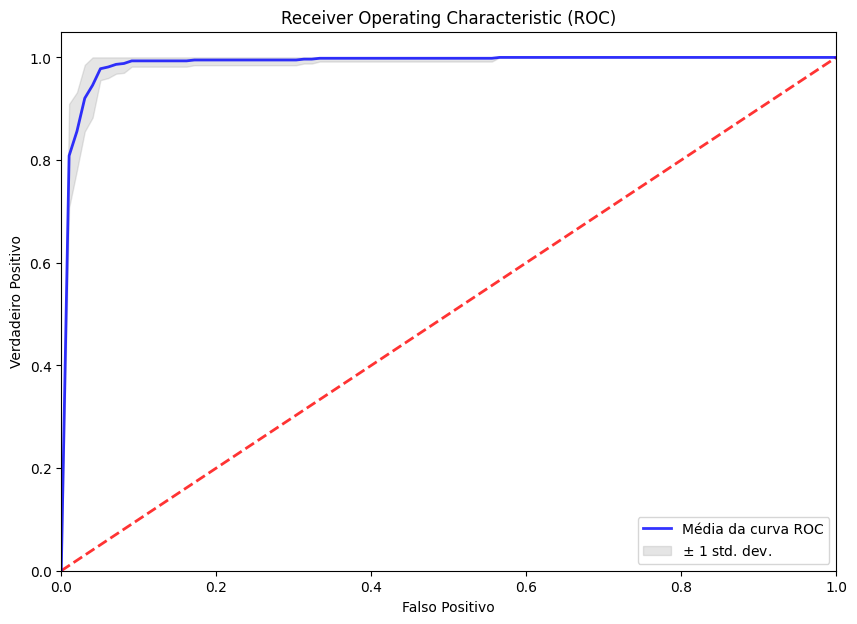

<built-in function format>
AUC médio: 0.9508946902700207
F1-score médio: 0.6800645273079803

Relatório de classificação:

                precision    recall  f1-score   support

CorpIndustrial       1.00      0.51      0.68        35
      Economia       0.97      0.90      0.93       589
     GovSocial       0.96      0.87      0.91        90
      Mercados       0.97      1.00      0.98      2067

      accuracy                           0.97      2781
     macro avg       0.97      0.82      0.88      2781
  weighted avg       0.97      0.97      0.96      2781



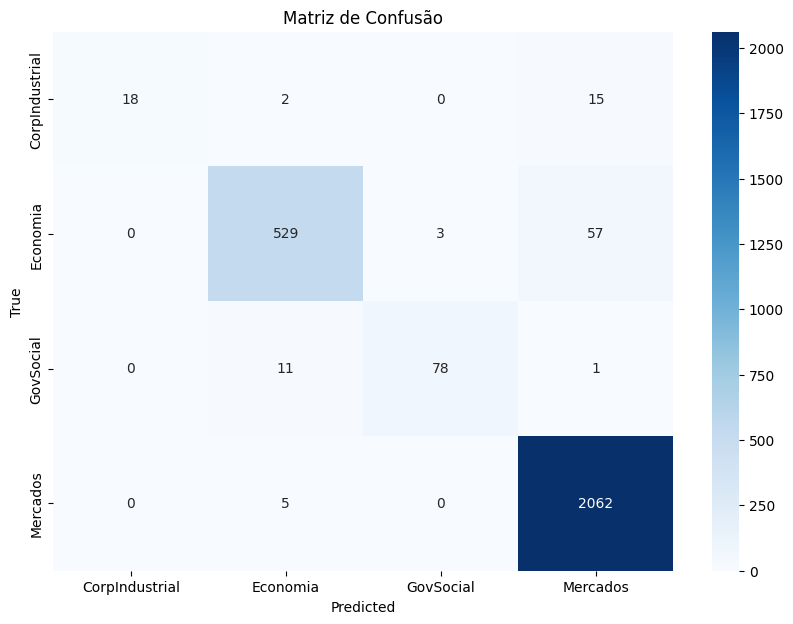

In [ ]:
validation_model(X_train_tf, train_class_df_encoded, method='TF')

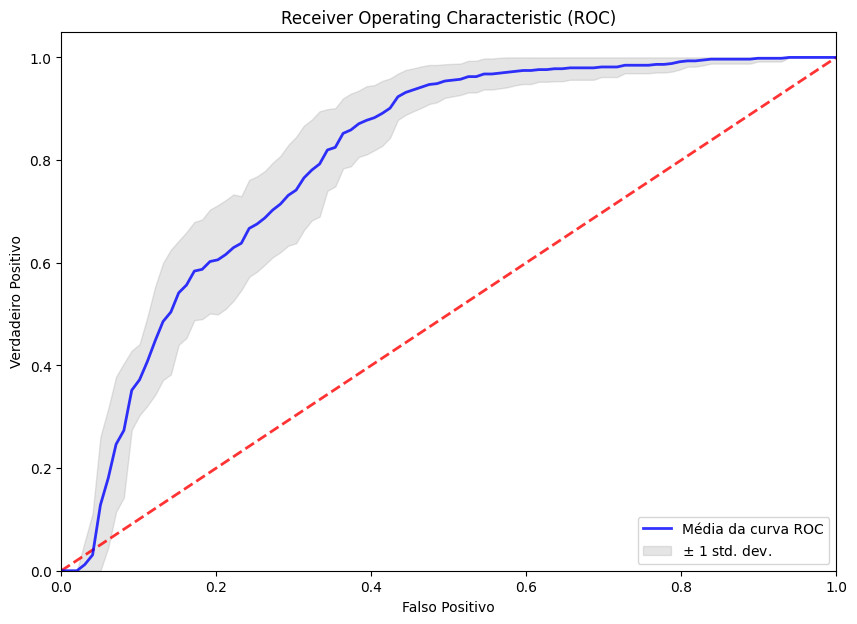

<built-in function format>
AUC médio: 0.8020232237583872
F1-score médio: 0.2131806854447856

Relatório de classificação:

                precision    recall  f1-score   support

CorpIndustrial       0.00      0.00      0.00        35
      Economia       0.00      0.00      0.00       589
     GovSocial       0.00      0.00      0.00        90
      Mercados       0.74      1.00      0.85      2067

      accuracy                           0.74      2781
     macro avg       0.19      0.25      0.21      2781
  weighted avg       0.55      0.74      0.63      2781



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


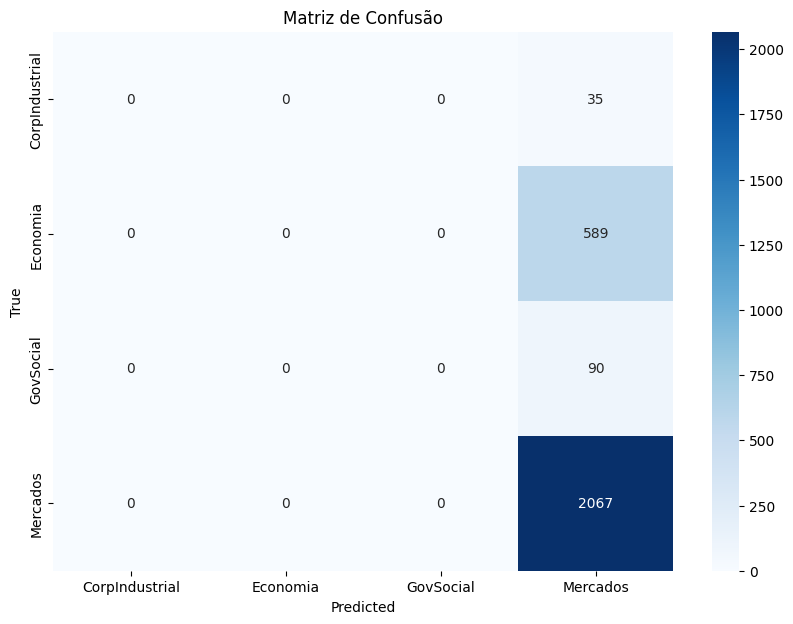

In [ ]:
validation_model(X_train_emb_pretrained, train_class_df_encoded, method='embedding-pretrained')

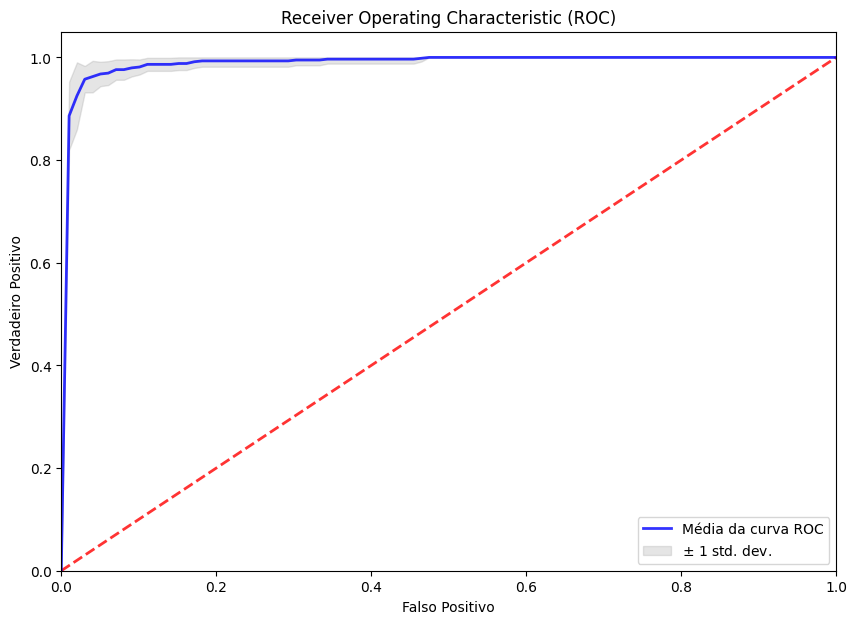

<built-in function format>
AUC médio: 0.9713494513868735
F1-score médio: 0.7813096178923987

Relatório de classificação:

                precision    recall  f1-score   support

CorpIndustrial       0.83      1.00      0.91        35
      Economia       0.99      0.97      0.98       589
     GovSocial       0.93      0.99      0.96        90
      Mercados       0.99      0.99      0.99      2067

      accuracy                           0.99      2781
     macro avg       0.94      0.99      0.96      2781
  weighted avg       0.99      0.99      0.99      2781



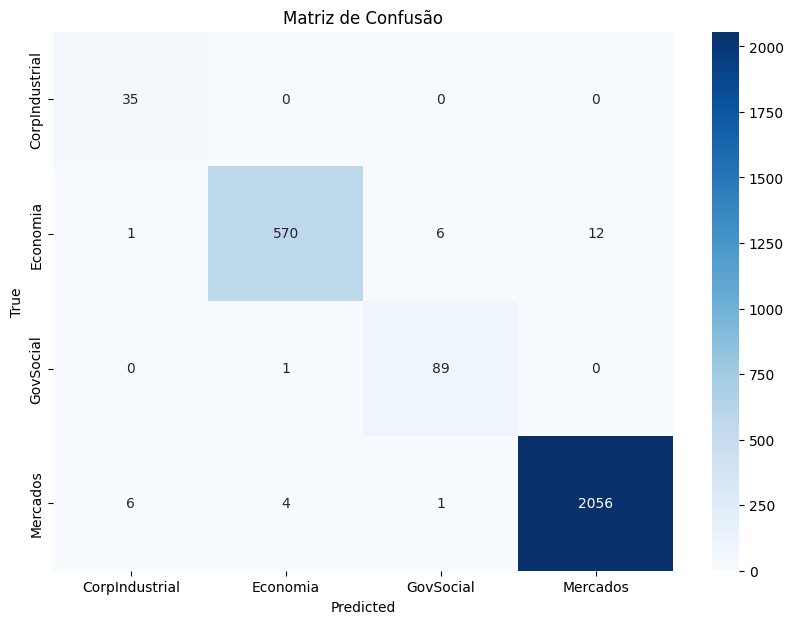

In [ ]:
validation_model(X_train_tf_idf, train_class_df_encoded, method='TF-IDF')

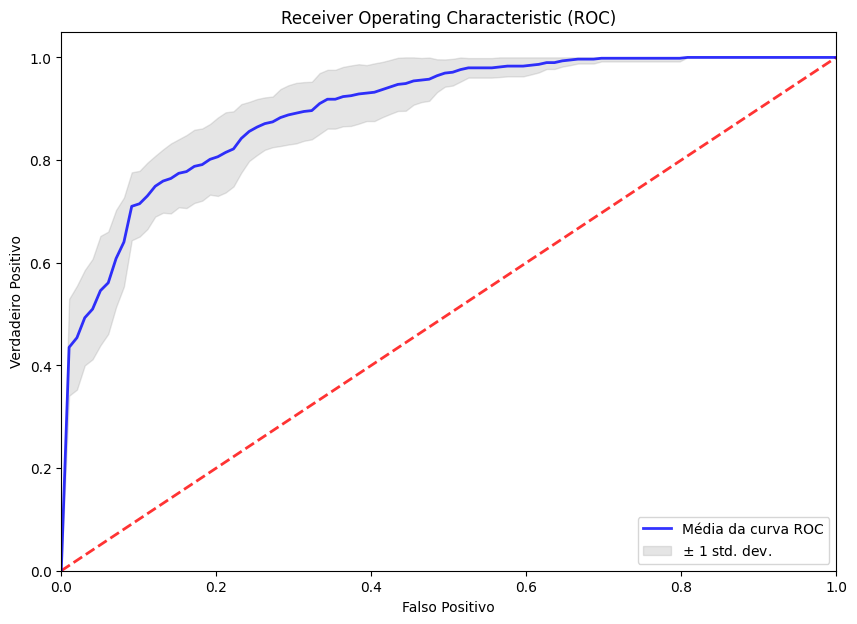

<built-in function format>
AUC médio: 0.8816775843783143
F1-score médio: 0.5158479995033648

Relatório de classificação:

                precision    recall  f1-score   support

CorpIndustrial       0.00      0.00      0.00        35
      Economia       0.71      0.66      0.68       589
     GovSocial       0.30      0.82      0.44        90
      Mercados       0.96      0.93      0.95      2067

      accuracy                           0.86      2781
     macro avg       0.49      0.60      0.52      2781
  weighted avg       0.88      0.86      0.86      2781



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


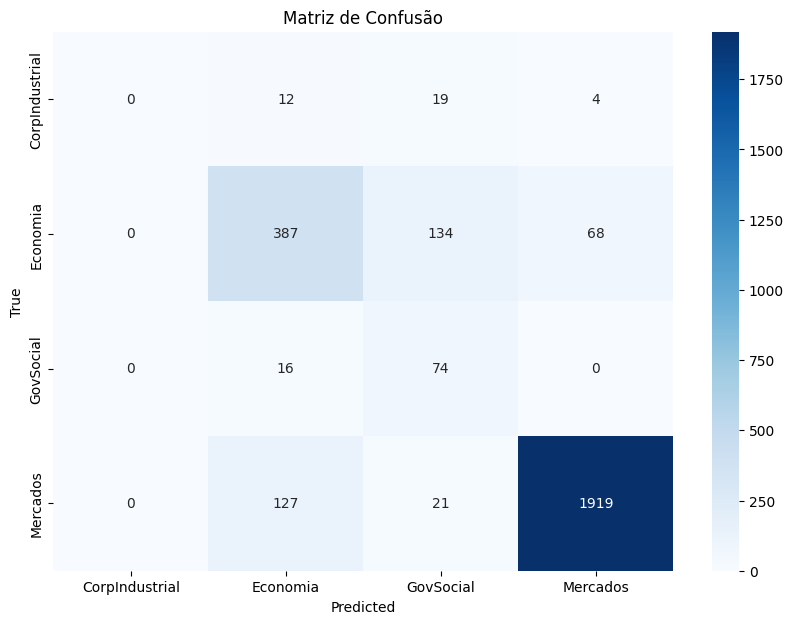

In [ ]:
validation_model(X_train_embedding, train_class_df_encoded, method='embedding')

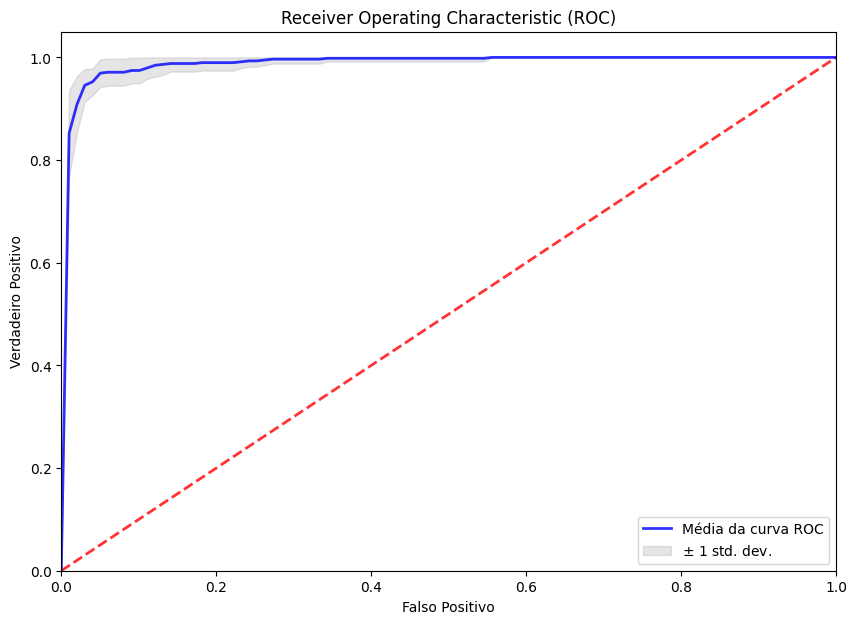

<built-in function format>
AUC médio: 0.9611467899516667
F1-score médio: 0.7780847659366591

Relatório de classificação:

                precision    recall  f1-score   support

CorpIndustrial       0.82      0.91      0.86        35
      Economia       0.99      0.95      0.97       589
     GovSocial       0.91      0.97      0.94        90
      Mercados       0.99      1.00      0.99      2067

      accuracy                           0.98      2781
     macro avg       0.93      0.96      0.94      2781
  weighted avg       0.98      0.98      0.98      2781



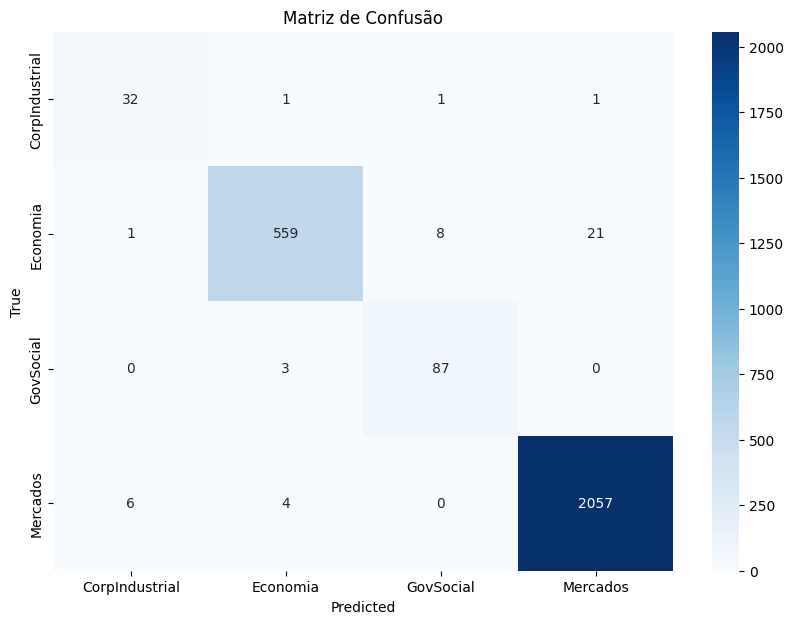

In [ ]:
validation_model(X_train_binary, train_class_df_encoded, method='binario')